# Machine Learning intern at Prasunet Company

## Author: Pothumanchi Bhargav Narendra Raju

### Prasunet_ML_02

##Task 02: Customer Segmentation using K-means clustering

### Project Overview
This project aims to segment customers of a retail store based on their purchase history using a K-means clustering algorithm. The dataset used for this project is from Kaggle and contains detailed information about customers and their spending patterns.

### Dataset
The dataset can be found on Kaggle: Customer Segmentation Tutorial in Python. It includes various attributes of customers that are useful for segmentation, such as annual income and spending score.

### Features Used
The key features used for customer segmentation are:

1. **Annual Income**: The annual income of the customers.
2. **Spending Score**: A score assigned to the customers based on their purchasing behavior.

These features were selected to create meaningful clusters that represent different customer segments.

### Model
A K-means clustering algorithm was applied to the dataset to group customers into distinct segments based on their purchase history. The optimal number of clusters was determined using the Elbow method.

### Segmentation Results
The clustering results are displayed in a Jupyter notebook (.ipynb file) and provide insights into the different customer segments.

### Repository Structure
* **Mall_Customers.csv**: Contains the dataset files.
* **Prasunet_ML_02.ipynb**: Jupyter notebooks used for data exploration, clustering, and evaluation.


In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Select relevant columns for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


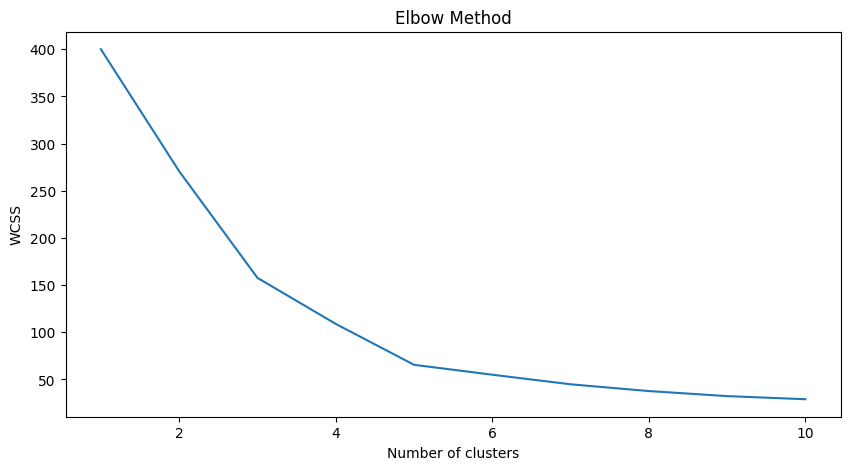

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [7]:
# From the Elbow method, assume the optimal number of clusters is 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


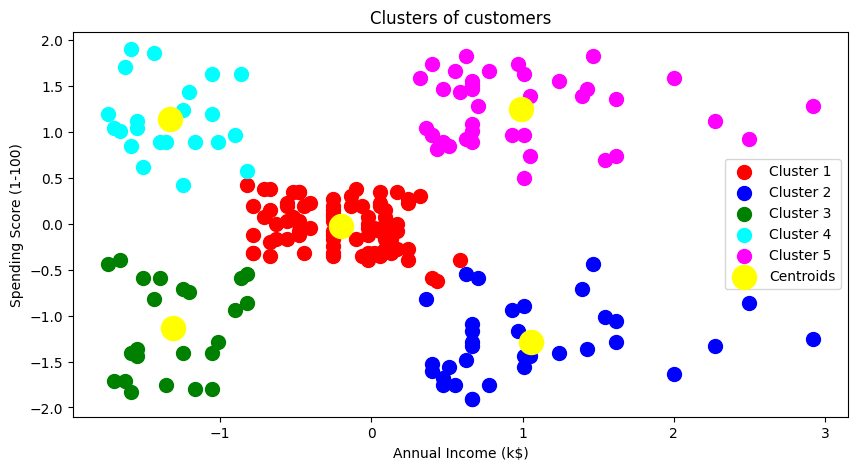

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
